<a href="https://colab.research.google.com/github/proteasen/data_science_projects/blob/main/bipolar_seesaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Creating time series for T_n from 35ka B.P. to present

In [ ]:
import numpy as np
import pandas as pd

start_year = 35000 # 35,000 years B.P.
end_year = 0 # present year
date_range = np.arange(start_year, end_year, -10)

# trends
trend_1_years = 2000 # THC 'on'
trend_2_years = 5000  # THC 'off'

# Number of time steps for each cycle
trend_1_steps = trend_1_years // 10
trend_2_steps = trend_2_years // 10
cycle_steps = trend_1_steps + trend_2_steps + 2

# Perturbing across all cycles
full_trend = []
num_full_cycles = len(date_range) // cycle_steps

for one_cycle in range(num_full_cycles):
    trend_1_value = np.random.uniform(0.9, 1.2) # perturbed value for one cycle
    trend_2_value = np.random.uniform(-1.2, -0.9) # perturbed value for one cycle

    trend_1 = np.full(trend_1_steps, trend_1_value) # ensure each cycle has a constant value
    vertical_drop = np.array([trend_2_value]) # after trend_1, assume vertical decrease from 'on' to 'off'
    trend_2 = np.full(trend_2_steps, trend_2_value) # ensure each cycle has a constant value
    vertical_increase = np.array([trend_1_value]) # assume vertical increase from 'off' to 'on'
    cycle = np.concatenate([trend_1, vertical_drop, trend_2, vertical_increase])
    full_trend.extend(cycle)

    remaining_values = len(date_range) % len(cycle)
    if remaining_values > 0:
        cycle = cycle[:remaining_values]
        full_trend.extend(cycle)

full_trend = full_trend[:len(date_range)] # ensure number of cycles in full_trend does not exceed date_range cycles

# Obtain final Tn time series
T_n_time_series = pd.DataFrame({"Date": date_range, "Value": full_trend})

print(T_n_time_series)

### Creating time series for T_s based on T_n values

In [ ]:
import pandas as pd

T_s = 0 # assuming T_s = 0 at 35ka
T_s_time_series = []

for index, row in T_n_time_series.iterrows():
    T_n = row["Value"]
    change_T_s = 10 * (1/1000) * (-T_n-T_s) # assume timescale of heat reservoir is constant at 1000 years
    T_s += change_T_s
    T_s_time_series.append({"Date": row["Date"], "Value": T_s})

T_s_time_series = pd.DataFrame(T_s_time_series)

print(T_s_time_series)

         Date     Value
0     35000.0 -0.010918
1     34990.0 -0.021726
2     34980.0 -0.032426
3     34970.0 -0.043020
4     34960.0 -0.053507
...       ...       ...
3495     50.0  0.942431
3496     40.0  0.922054
3497     30.0  0.901880
3498     20.0  0.881909
3499     10.0  0.862137

[3500 rows x 2 columns]


### Creating time series for T_s_noise based on T_s values

In [ ]:
import pandas as pd

T_s_values = T_s_time_series["Value"]
mean_T_s = sum(T_s_values) / len(T_s_values) # calculate mean of T_s values
variance_T_s = sum((x - mean_T_s) ** 2 for x in T_s_values) / (len(T_s_values) - 1)  # calculate white noise variance
std_T_s = np.sqrt(variance_T_s)  # standard deviation (σ)

noise = 0 # assuming r = 0 at 35ka since T_s = 0 at 35ka
T_s_noise = 0 # assuming T_s = 0 at 35ka
T_s_noise_time_series = []

for index, row in T_s_time_series.iterrows():
    T_s = row["Value"]
    eta = np.random.normal(0, 1)
    noise = 0.9 * noise + (std_T_s * eta) # assuming red noise parameter is 0.9
    T_s_noise = T_s + noise
    T_s_noise_time_series.append({"Date": row["Date"], "Value": T_s_noise})

T_s_noise_time_series = pd.DataFrame(T_s_noise_time_series)

print(T_s_noise_time_series)

### Plot T_n, T_s, T_s_noise   

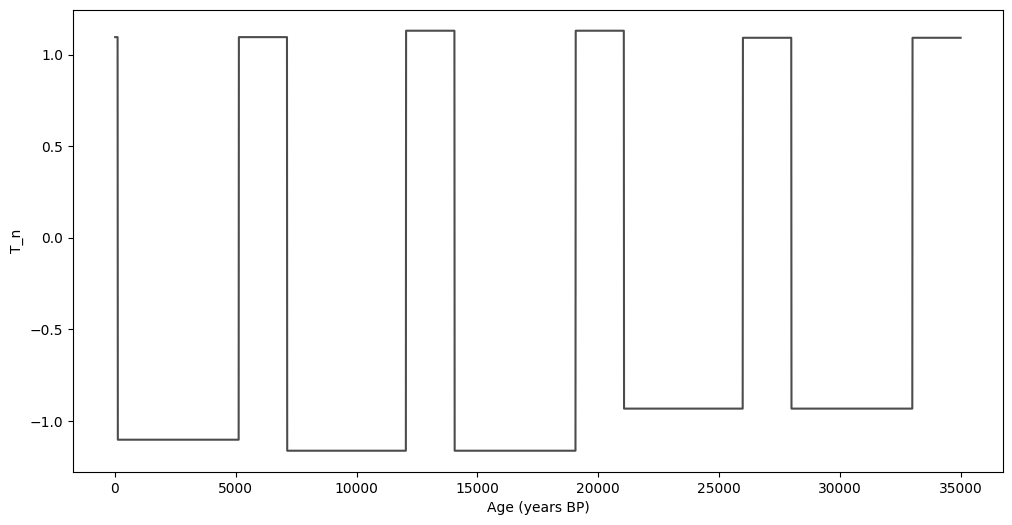

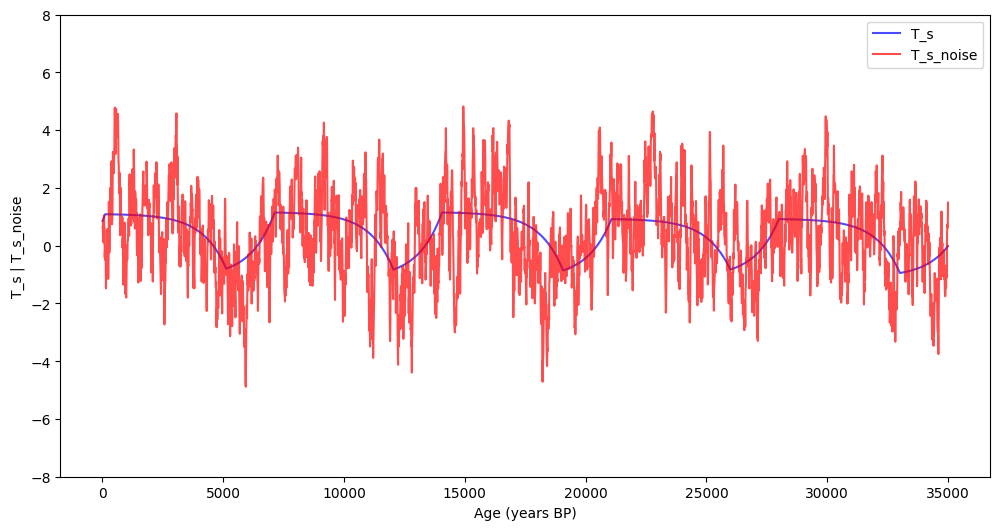

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# T_n
plt.figure(figsize=(12, 6))
plt.plot(T_n_time_series["Date"], T_n_time_series["Value"], color="black", alpha=0.7)
plt.xlabel("Age (years BP)")
plt.ylabel("T_n")
plt.yticks(np.arange(-1,1.1,0.5))
plt.xticks(np.arange(0, 36000, 5000))
plt.show()

# T_s and T_s_noise
plt.figure(figsize=(12, 6))
plt.plot(T_s_time_series["Date"], T_s_time_series["Value"], color="blue", alpha=0.7, label="T_s")
plt.plot(T_s_noise_time_series["Date"], T_s_noise_time_series["Value"], color="red", alpha=0.7, label="T_s_noise")
plt.xlabel("Age (years BP)")
plt.ylabel("T_s | T_s_noise")
plt.yticks(np.arange(-8, 8.1, 2))
plt.xticks(np.arange(0, 36000, 5000))
plt.legend()